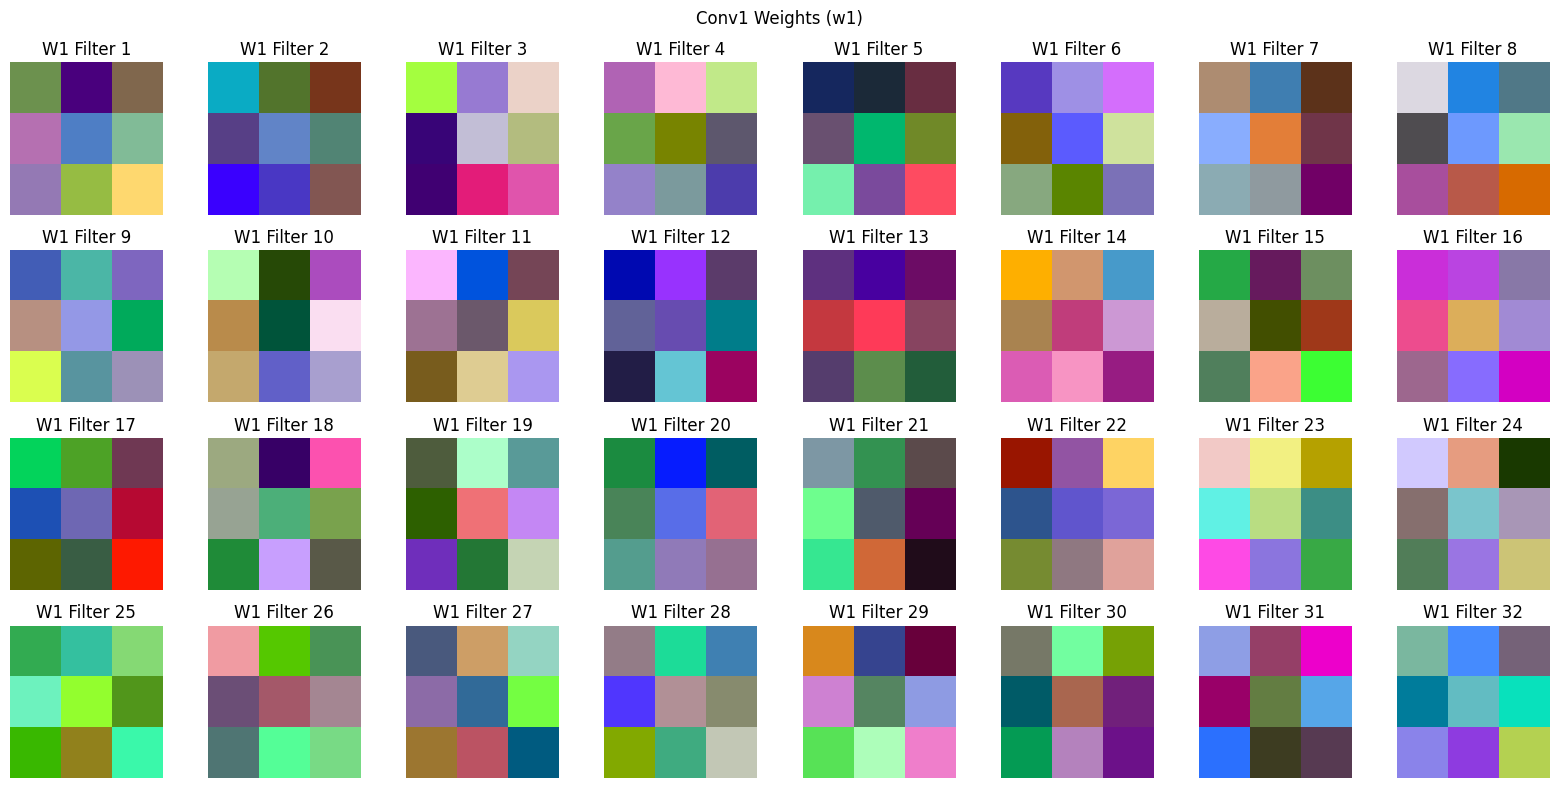

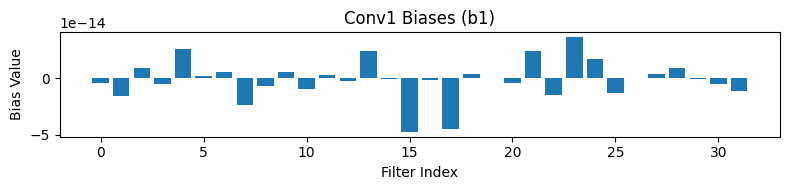

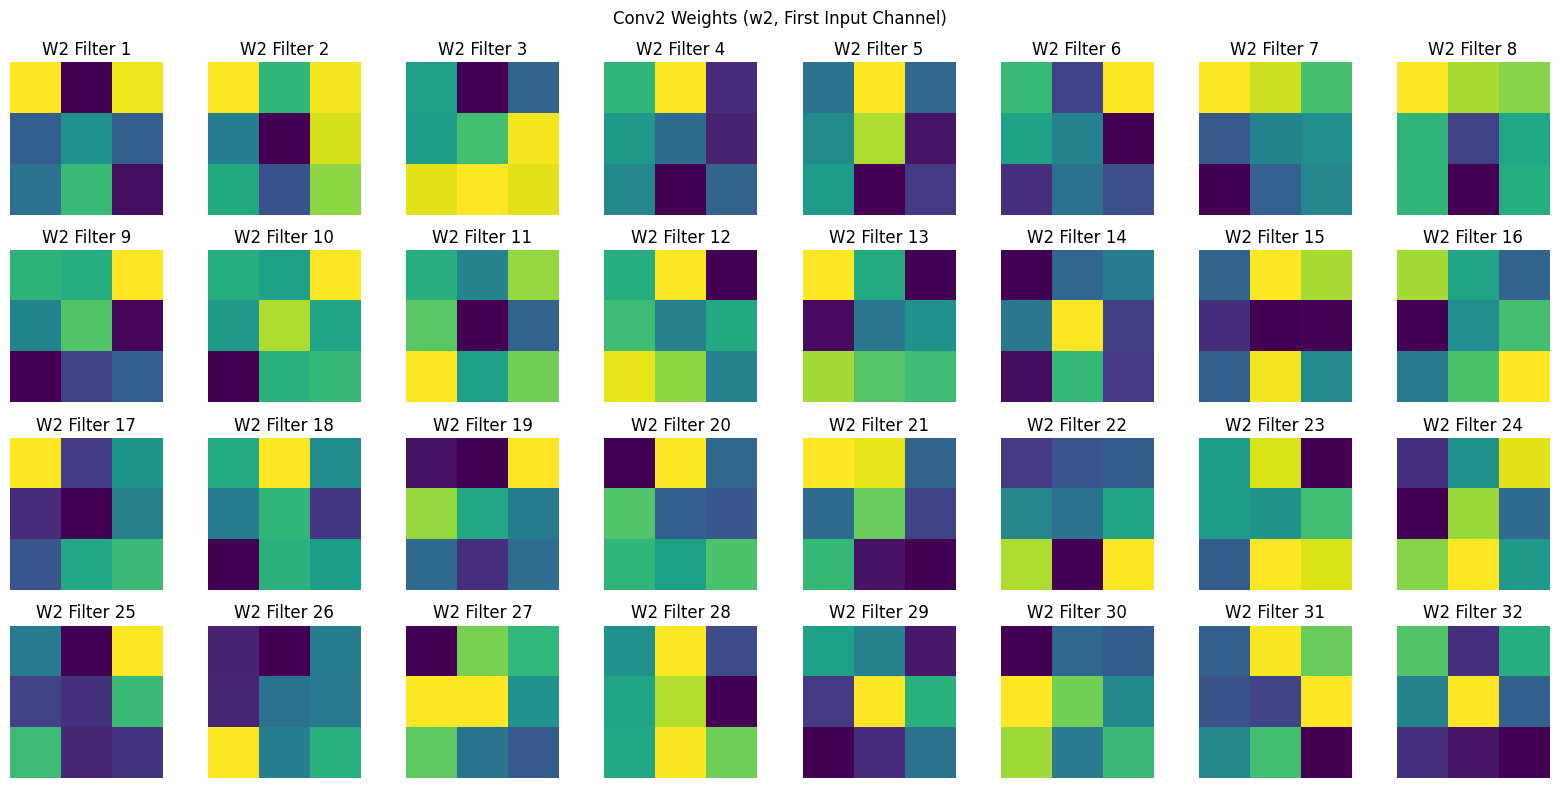

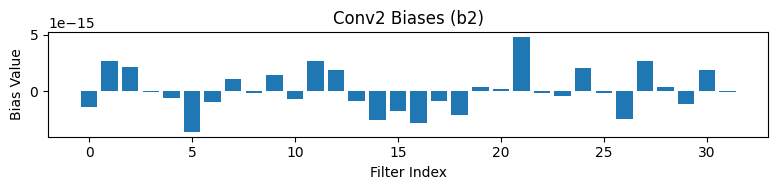

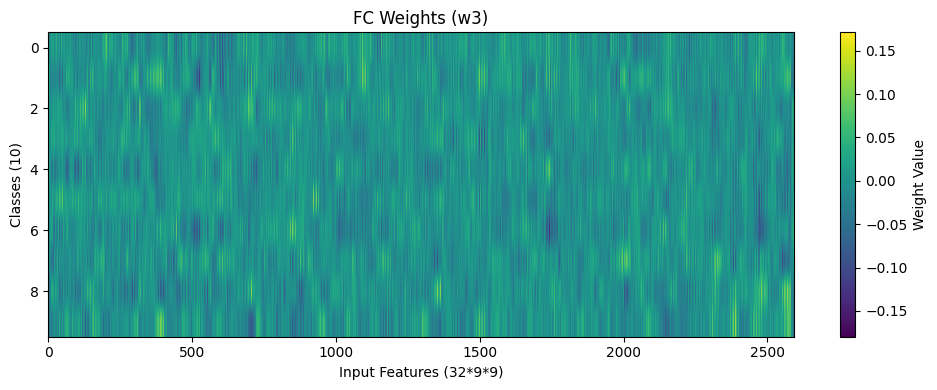

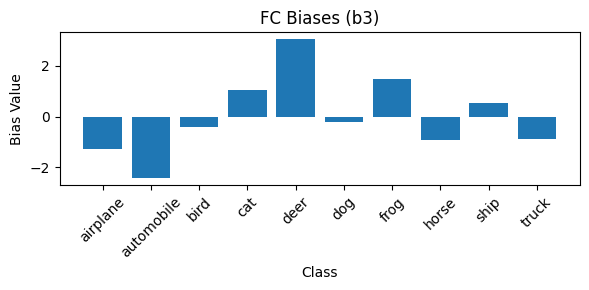

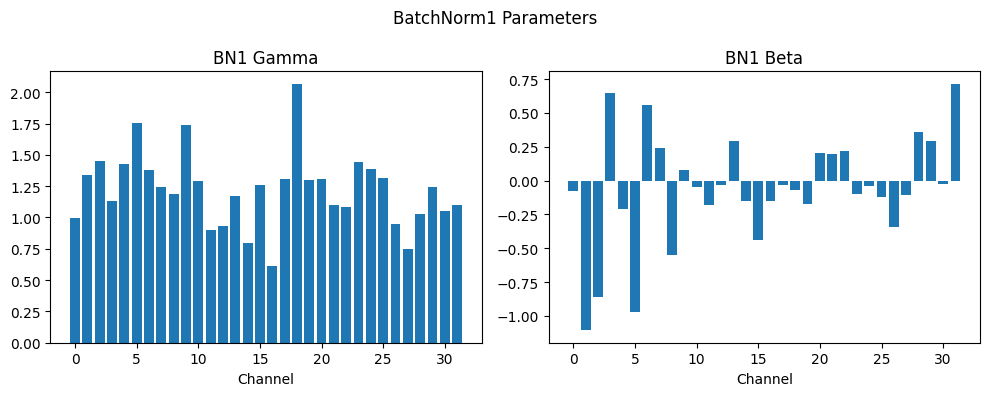

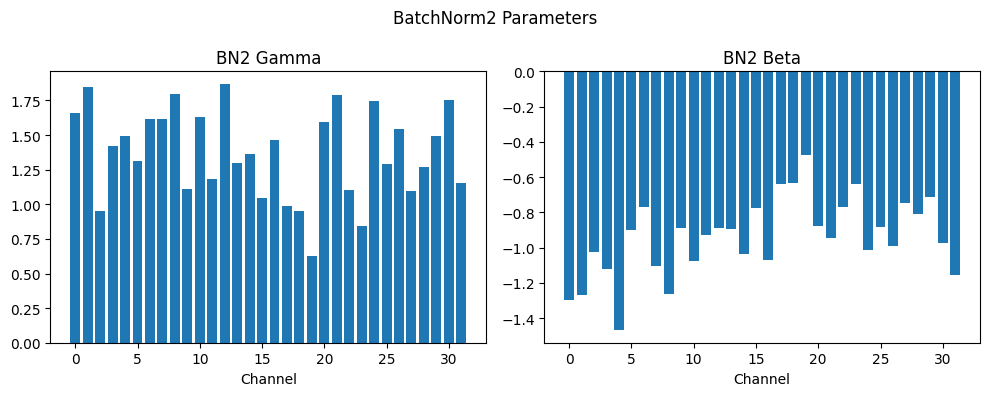

In [1]:
import os
import pickle
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from model import ConvNet

def load_cifar10_batch(file):
    with open(file, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
    data = batch[b'data'].reshape(-1, 3, 32, 32) / 255.0
    labels = batch[b'labels']
    return data, labels

def visualize_weights_and_biases(model, model_file):
    """
    Visulize the weights and biases of a ConvNet model
    Parameters:
        model: ConvNet model
        model_file: model.npz file path
    """
    try:
        weights_np = np.load(model_file)
        weights = {k: cp.array(v) for k, v in weights_np.items()}
        
        model.w1 = weights['w1']
        model.b1 = weights['b1']
        model.w2 = weights['w2']
        model.b2 = weights['b2']
        model.w3 = weights['w3']
        model.b3 = weights['b3']
        model.gamma1 = weights['gamma1']
        model.beta1 = weights['beta1']
        model.gamma2 = weights['gamma2']
        model.beta2 = weights['beta2']
    except Exception as e:
        print(f"Fail to load model.npz: {model_file}: {str(e)}")
        return

    w1 = cp.asnumpy(model.w1)  
    num_filters = w1.shape[0]
    cols = 8
    rows = int(np.ceil(num_filters / cols))
    
    plt.figure(figsize=(cols * 2, rows * 2))
    for i in range(num_filters):
        plt.subplot(rows, cols, i + 1)
        filter_img = w1[i].transpose(1, 2, 0)
        filter_img = (filter_img - filter_img.min()) / (filter_img.max() - filter_img.min() + 1e-8)
        plt.imshow(filter_img)
        plt.axis('off')
        plt.title(f'W1 Filter {i+1}')
    plt.suptitle('Conv1 Weights (w1)')
    plt.tight_layout()
    plt.show()

    b1 = cp.asnumpy(model.b1)
    plt.figure(figsize=(8, 2))
    plt.bar(range(len(b1)), b1)
    plt.title('Conv1 Biases (b1)')
    plt.xlabel('Filter Index')
    plt.ylabel('Bias Value')
    plt.tight_layout()
    plt.show()

    w2 = cp.asnumpy(model.w2)
    num_filters = w2.shape[0]
    cols = 8
    rows = int(np.ceil(num_filters / cols))
    
    plt.figure(figsize=(cols * 2, rows * 2))
    for i in range(num_filters):
        plt.subplot(rows, cols, i + 1)
        filter_img = w2[i, 0]  # (3,3)
        filter_img = (filter_img - filter_img.min()) / (filter_img.max() - filter_img.min() + 1e-8)
        plt.imshow(filter_img, cmap='viridis')
        plt.axis('off')
        plt.title(f'W2 Filter {i+1}')
    plt.suptitle('Conv2 Weights (w2, First Input Channel)')
    plt.tight_layout()
    plt.show()

    b2 = cp.asnumpy(model.b2)
    plt.figure(figsize=(8, 2))
    plt.bar(range(len(b2)), b2)
    plt.title('Conv2 Biases (b2)')
    plt.xlabel('Filter Index')
    plt.ylabel('Bias Value')
    plt.tight_layout()
    plt.show()

    w3 = cp.asnumpy(model.w3)
    plt.figure(figsize=(10, 4))
    plt.imshow(w3.T, aspect='auto', cmap='viridis')
    plt.colorbar(label='Weight Value')
    plt.title('FC Weights (w3)')
    plt.xlabel('Input Features (32*9*9)')
    plt.ylabel('Classes (10)')
    plt.tight_layout()
    plt.show()

    b3 = cp.asnumpy(model.b3)
    plt.figure(figsize=(6, 3))
    plt.bar(CIFAR10_CLASSES, b3)
    plt.title('FC Biases (b3)')
    plt.xlabel('Class')
    plt.ylabel('Bias Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    gamma1 = cp.asnumpy(model.gamma1)
    beta1 = cp.asnumpy(model.beta1)
    gamma2 = cp.asnumpy(model.gamma2)
    beta2 = cp.asnumpy(model.beta2)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(range(len(gamma1)), gamma1)
    plt.title('BN1 Gamma')
    plt.xlabel('Channel')
    plt.subplot(1, 2, 2)
    plt.bar(range(len(beta1)), beta1)
    plt.title('BN1 Beta')
    plt.xlabel('Channel')
    plt.suptitle('BatchNorm1 Parameters')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(range(len(gamma2)), gamma2)
    plt.title('BN2 Gamma')
    plt.xlabel('Channel')
    plt.subplot(1, 2, 2)
    plt.bar(range(len(beta2)), beta2)
    plt.title('BN2 Beta')
    plt.xlabel('Channel')
    plt.suptitle('BatchNorm2 Parameters')
    plt.tight_layout()
    plt.show()

def main():
    model_file = '/path/to/best_model'
    model = ConvNet()    
    visualize_weights_and_biases(model, model_file)

if __name__ == "__main__":
    main()